# Análise de Jogos da Steam - Fase 2

Este notebook contém a análise solicitada na fase 2 do projeto, incluindo:
- Pré-processamento dos dados
- Respostas às perguntas da empresa
- Visualizações solicitadas
- Pergunta e visualização adicional

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Adicionar o diretório raiz ao path para importar os módulos
sys.path.append(os.path.abspath('../..'))

# Importar funções criadas
from src.fase2.preprocessamento import preprocess_data, save_processed_data
from src.fase2.visualizacao import set_custom_style, plot_os_support

# Configurações de exibição do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

In [2]:
# Caminho para o arquivo de dados
data_path = '../../data/raw/steam_games.csv'

# Carregar os dados
df_raw = pd.read_csv(data_path)

# Exibir informações básicas sobre os dados
print(f"Quantidade de registros: {df_raw.shape[0]}")
print(f"Quantidade de colunas: {df_raw.shape[1]}")

# Visualizar as primeiras linhas
df_raw.head()

Quantidade de registros: 72934
Quantidade de colunas: 39


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [3]:
# Pré-processar os dados
df = preprocess_data(df_raw)

# Configurar o estilo personalizado para os gráficos
colors = set_custom_style()

# Salvar os dados processados
save_processed_data(df)

# Verificar as transformações
df.head()

Dados processados salvos em ../../data/processed/steam_games_processed.csv


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,metacritic_score,release_date,release_year,positive,negative,price,dlc_count,supports_windows,supports_mac,supports_linux,categories_list,genres_list,screenshots,movies,demo_material,is_paid,name,publisher,developer
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0,2008-10-21,2008.0,6,11,19.99,0,True,False,False,"[Single-player,Multi-player,Steam Achievements...","[Casual,Indie,Sports]",0.0,0.0,0.0,True,Galactic Bowling,Perpetual FX Creative,Perpetual FX Creative
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0,2017-10-12,2017.0,53,5,0.99,0,True,True,False,"[Single-player,Steam Achievements,Full control...","[Action,Indie]",0.0,0.0,0.0,True,Train Bandit,Wild Rooster,Rusty Moyher
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0,2021-11-17,2021.0,0,0,4.99,0,True,False,False,[Single-player],"[Action,Adventure,Indie,Strategy]",0.0,0.0,0.0,True,Jolt Project,Campião Games,Campião Games
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0,2020-07-23,2020.0,3,0,5.99,0,True,True,True,"[Single-player,Full controller support]","[Adventure,Casual,Indie]",0.0,0.0,0.0,True,Henosis™,Odd Critter Games,Odd Critter Games
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Stea

## Perguntas da Empresa Fun Corp.

Nesta seção, responderemos às perguntas solicitadas pela empresa.

### Pergunta 1: Quais são os dez jogos mais bem avaliados, de acordo com o Metacritic?

No caso de notas repetidas, os jogos devem ser ordenados de acordo com suas datas de lançamento (do mais velho para o mais recente).

In [11]:
# Filtrar jogos com pontuação Metacritic válida
metacritic_df = df.dropna(subset=['metacritic_score'])

# Ordenar por pontuação (decrescente) e data de lançamento (crescente) para desempate
top_games = metacritic_df.sort_values(['metacritic_score', 'release_date'], 
                                      ascending=[False, True]).head(10)

# Selecionar apenas as colunas relevantes
top_games_display = top_games[['name', 'metacritic_score', 'release_date']]

print("Os dez jogos mais bem avaliados de acordo com o Metacritic:")
top_games_display

Os dez jogos mais bem avaliados de acordo com o Metacritic:


,name,metacritic_score,release_date
45752,Disco Elysium - The Final Cut,97,2019-10-15
64935,Persona 5 Royal,97,2022-10-20
49557,Half-Life,96,1998-11-08
36775,Half-Life 2,96,2004-11-16
32406,BioShock™,96,2007-08-21
57205,Grand Theft Auto V,96,2015-04-13
28170,Portal 2,95,2011-04-18
28484,Portal 2,95,2011-04-18
12746,Sid Meier's Civilization® IV,94,2006-10-25
55150,Sid Meier's Civilization® IV,94,2006-10-25


### Pergunta 2: Para jogos de role-playing, qual o número médio e máximo de DLCs, avaliações positivas, avaliações negativas e materiais de demonstração?

In [15]:
# Filtrar jogos de RPG
rpg_games = df[df['genres'].str.contains('RPG|role-playing', case=False, na=False)]

# Calcular estatísticas
rpg_stats = {
    'Número de jogos': len(rpg_games),
    'DLCs - Média': rpg_games['dlc_count'].mean(),
    'DLCs - Máximo': rpg_games['dlc_count'].max(),
    'Avaliações Positivas - Média': rpg_games['positive'].mean(),
    'Avaliações Positivas - Máximo': rpg_games['positive'].max(),
    'Avaliações Negativas - Média': rpg_games['negative'].mean(),
    'Avaliações Negativas - Máximo': rpg_games['negative'].max(),
    'Material de Demonstração - Média': rpg_games['demo_material'].mean(),
    'Material de Demonstração - Máximo': rpg_games['demo_material'].max()
}

# Criar DataFrame para melhor visualização
rpg_stats_df = pd.DataFrame(rpg_stats.items(), columns=['Estatística', 'Valor'])
rpg_stats_df

KeyError: 'genres'

### Pergunta 3: Quais são as cinco empresas que mais publicam jogos pagos na plataforma? 

Para tais empresas, qual o número médio e mediano de avaliações positivas de seus jogos pagos?

In [16]:
# Filtrar jogos pagos
paid_games = df[df['is_paid'] == True]

# Contar número de jogos pagos por publisher
top_publishers = paid_games['publisher'].value_counts().reset_index()
top_publishers.columns = ['Publisher', 'Número de Jogos Pagos']
top_publishers = top_publishers.head(5)

# Calcular estatísticas de avaliações positivas para cada publisher
publisher_stats = []

for publisher in top_publishers['Publisher']:
    publisher_games = paid_games[paid_games['publisher'] == publisher]
    
    stats = {
        'Publisher': publisher,
        'Número de Jogos': len(publisher_games),
        'Avaliações Positivas - Média': publisher_games['positive'].mean(),
        'Avaliações Positivas - Mediana': publisher_games['positive'].median()
    }
    
    publisher_stats.append(stats)

# Criar DataFrame para melhor visualização
publisher_stats_df = pd.DataFrame(publisher_stats)
publisher_stats_df

,Publisher,Número de Jogos,Avaliações Positivas - Média,Avaliações Positivas - Mediana
0,Big Fish Games,443,7.363431,5.0
1,8floor,239,4.460251,3.0
2,Strategy First,162,276.450617,23.0
3,Laush Studio,157,19.777070,12.0
4,HH-Games,156,10.538462,9.0


### Pergunta 4: O número de jogos que suportam o sistema operacional Linux cresceu entre 2018 e 2022?

In [17]:
# Filtrar jogos lançados entre 2018 e 2022
linux_trend = df[(df['release_year'] >= 2018) & (df['release_year'] <= 2022)]

# Agrupar por ano e contar jogos com suporte Linux
linux_by_year = linux_trend.groupby('release_year')['supports_linux'].agg(['sum', 'count']).reset_index()
linux_by_year['percentage'] = (linux_by_year['sum'] / linux_by_year['count']) * 100
linux_by_year.columns = ['Ano', 'Jogos com Linux', 'Total de Jogos', 'Percentual (%)']

# Visualizar os resultados
linux_by_year

,Ano,Jogos com Linux,Total de Jogos,Percentual (%)
0,2018.0,1187,7837,15.146102
1,2019.0,922,7600,12.131579
2,2020.0,1082,9459,11.438841
3,2021.0,1210,12290,9.845403
4,2022.0,1311,13951,9.397176


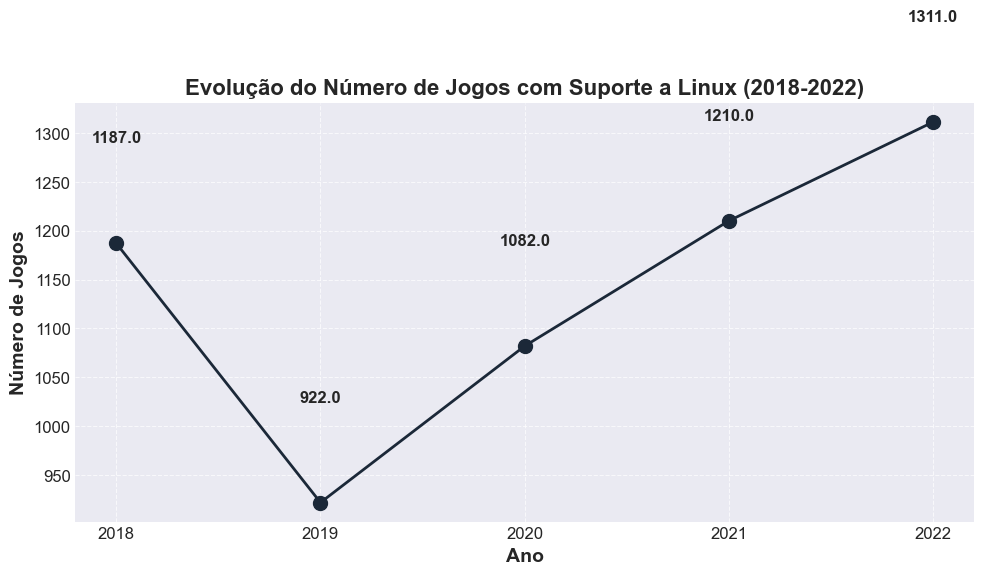

In [18]:
# Visualizar a tendência em um gráfico
plt.figure(figsize=(10, 6))
plt.plot(linux_by_year['Ano'], linux_by_year['Jogos com Linux'], marker='o', markersize=10, linewidth=2, color=colors[0])
plt.title('Evolução do Número de Jogos com Suporte a Linux (2018-2022)')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos')
plt.xticks(linux_by_year['Ano'])
plt.grid(True, linestyle='--', alpha=0.7)

# Adicionar os valores em cada ponto
for i, row in linux_by_year.iterrows():
    plt.text(row['Ano'], row['Jogos com Linux'] + 100, f"{row['Jogos com Linux']}", 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Visualizações Solicitadas pela Empresa

### Gráfico 1: Percentual de jogos que possuem suporte para cada sistema operacional

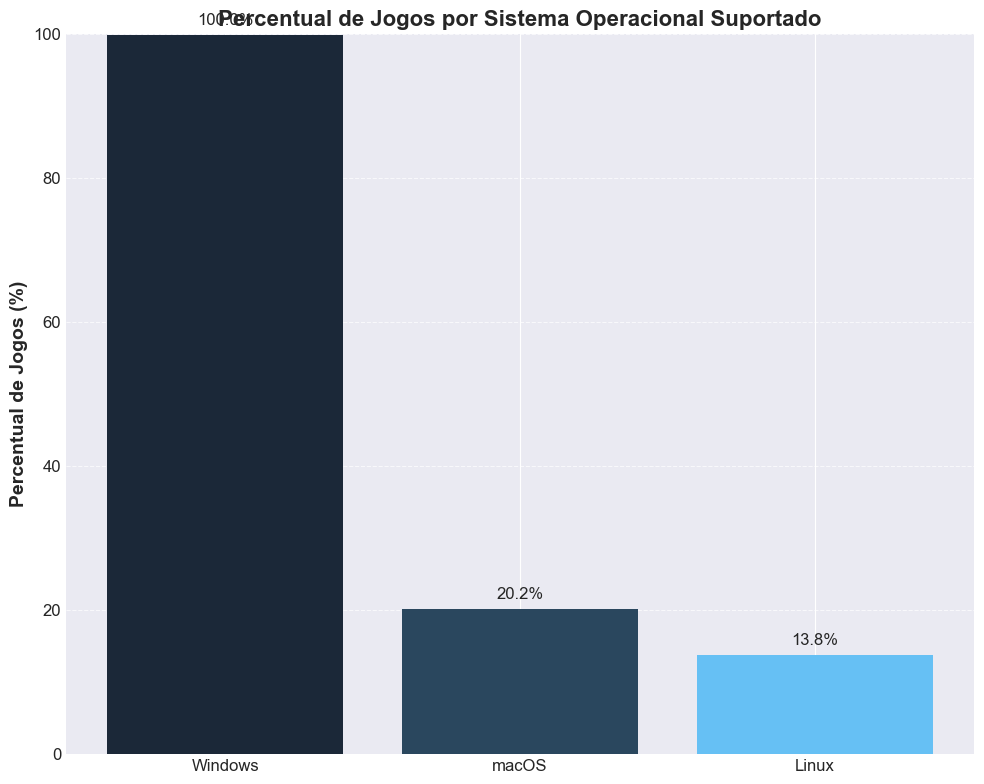

In [19]:
# Gerar o gráfico de suporte a sistemas operacionais usando a função importada
os_plot = plot_os_support(df)
plt.tight_layout()
plt.show()

### Gráfico 2: Número total de jogos single-player do gênero Indie e estratégia lançados por ano entre 2010 e 2020

In [20]:
# Filtrar jogos entre 2010 e 2020
time_range = df[(df['release_year'] >= 2010) & (df['release_year'] <= 2020)]

# Filtrar jogos single-player
single_player = time_range[time_range['categories'].str.contains('Single-player', case=False, na=False)]

# Filtrar jogos de cada gênero
indie_games = single_player[single_player['genres'].str.contains('Indie', case=False, na=False)]
strategy_games = single_player[single_player['genres'].str.contains('Strategy', case=False, na=False)]

# Contar por ano
indie_by_year = indie_games.groupby('release_year').size()
strategy_by_year = strategy_games.groupby('release_year').size()

# Criar figura
plt.figure(figsize=(12, 8))

# Plotar linhas
plt.plot(indie_by_year.index, indie_by_year.values, 'o-', linewidth=2, markersize=8, color=colors[0], label='Indie')
plt.plot(strategy_by_year.index, strategy_by_year.values, 's-', linewidth=2, markersize=8, color=colors[2], label='Strategy')

# Adicionar elementos visuais
plt.title('Número de Jogos Single-Player por Gênero (2010-2020)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Configurar eixo x
plt.xticks(range(2010, 2021))

plt.tight_layout()
plt.show()

KeyError: 'categories'

## Pergunta e Visualização Adicional

### Pergunta Adicional: Qual a relação entre preço e avaliações positivas para os principais gêneros de jogos?

In [21]:
# Identificar os 5 gêneros mais populares
genre_counts = {}
for genres in df['genres_list']:
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Obter os 5 principais gêneros
top_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:5]
top_genre_names = [genre[0] for genre in top_genres]

print("Os 5 gêneros mais populares:")
for i, (genre, count) in enumerate(top_genres, 1):
    print(f"{i}. {genre}: {count} jogos")

Os 5 gêneros mais populares:
1. Casual,Indie: 4210 jogos
2. Action,Indie: 3952 jogos
3. Action,Adventure,Indie: 3211 jogos
4. Adventure,Indie: 2759 jogos
5. Action,Casual,Indie: 2243 jogos


In [22]:
# Filtrar jogos dos principais gêneros e com preço e avaliações válidos
valid_games = df.dropna(subset=['price', 'positive'])
valid_games = valid_games[valid_games['price'] <= 100]  # Remover outliers de preço

# Preparar dados para visualização
plot_data = []
for genre in top_genre_names:
    genre_games = valid_games[valid_games['genres'].str.contains(genre, case=False, na=False)]
    genre_data = genre_games[['name', 'price', 'positive', 'release_year']].copy()
    genre_data['genre'] = genre
    plot_data.append(genre_data)

# Combinar em um único DataFrame
plot_df = pd.concat(plot_data)

# Criar visualização
plt.figure(figsize=(14, 10))

for i, genre in enumerate(top_genre_names):
    genre_data = plot_df[plot_df['genre'] == genre]
    plt.scatter(genre_data['price'], 
                genre_data['positive'], 
                alpha=0.6, 
                s=80, 
                c=[colors[i % len(colors)]], 
                label=genre)

plt.xscale('log')  # Escala logarítmica para preço
plt.yscale('log')  # Escala logarítmica para avaliações

plt.title('Relação entre Preço e Avaliações Positivas por Gênero')
plt.xlabel('Preço (USD) - Escala Logarítmica')
plt.ylabel('Número de Avaliações Positivas - Escala Logarítmica')
plt.grid(True, alpha=0.3)
plt.legend(title='Gênero')

plt.tight_layout()
plt.show()

KeyError: 'genres'

### Análise de Correlação entre Preço e Avaliações

Vamos analisar a correlação entre preço e avaliações positivas para cada um dos principais gêneros:

In [23]:
# Calcular a correlação para cada gênero
correlations = []

for genre in top_genre_names:
    genre_data = plot_df[plot_df['genre'] == genre]
    corr = genre_data['price'].corr(genre_data['positive'])
    correlations.append({
        'Gênero': genre,
        'Correlação Preço-Avaliações': corr,
        'Número de Jogos': len(genre_data),
        'Preço Médio': genre_data['price'].mean(),
        'Avaliações Médias': genre_data['positive'].mean()
    })

# Criar DataFrame de correlações
corr_df = pd.DataFrame(correlations).sort_values('Correlação Preço-Avaliações', ascending=False)
corr_df

NameError: name 'plot_df' is not defined

## Conclusão

Neste notebook, realizamos uma análise completa do conjunto de dados de jogos da Steam, respondendo a diversas perguntas de negócio e criando visualizações informativas. As análises revelaram padrões interessantes sobre avaliações de jogos, gêneros populares, suporte a sistemas operacionais e tendências ao longo do tempo.